# Wine t-SNE

<b> Import pandas, numpy, and matplotlib, as well as the t-SNE and PCA models from scikit-learn </b>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

<b> Load the Wine dataset using the wine.data file </b>

In [2]:
wine = pd.read_csv('datasets/wine.data', header=None)
wine.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


<b> The first column contains the labels; extract this column and remove it from the dataset </b>

In [3]:
labels = wine[0]

In [4]:
del wine[0]

In [5]:
wine.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


<b> Execute PCA to reduce the dataset to the first six components </b>

In [6]:
model_pca = PCA(n_components=6)
wine_pca = model_pca.fit_transform(wine)

<b> Determine the amount of variance within the data described by these six components </b>

In [7]:
model_pca.explained_variance_ratio_

array([9.98091230e-01, 1.73591562e-03, 9.49589576e-05, 5.02173562e-05,
       1.23636847e-05, 8.46213034e-06])

In [8]:
np.sum(model_pca.explained_variance_ratio_)

0.99999314824536

<b> Create a t-SNE model using a specified random state and a verbose value of 1 </b>

In [9]:
tsne_model = TSNE(random_state=0, verbose=1)
tsne_model

TSNE(random_state=0, verbose=1)

<b> Fit the PCA data to the t-SNE model </b>

In [10]:
wine_tsne = tsne_model.fit_transform(wine_pca.reshape((len(wine_pca), -1)))

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 178 samples in 0.000s...
[t-SNE] Computed neighbors for 178 samples in 0.000s...
[t-SNE] Computed conditional probabilities for sample 178 / 178
[t-SNE] Mean sigma: 9.207049
[t-SNE] KL divergence after 250 iterations with early exaggeration: 51.192078
[t-SNE] KL divergence after 750 iterations: 0.128432


<b> Confirm that the shape of the t-SNE fitted data is two-dimensional </b>

In [11]:
wine_tsne.shape

(178, 2)

<b> Create a scatter plot of the two-dimensional data </b>

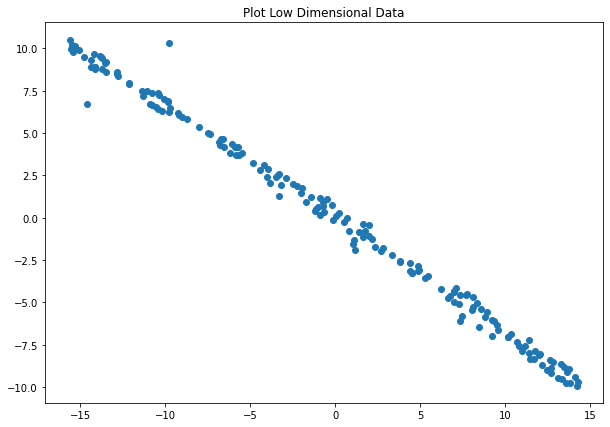

In [12]:
plt.figure(figsize=(10, 7))
plt.scatter(wine_tsne[:, 0], wine_tsne[:, 1])
plt.title('Plot Low Dimensional Data')
plt.show()

<b> Create a secondary scatter plot of the two-dimensional data with the class labels applied to visualize any clustering that may be present </b>

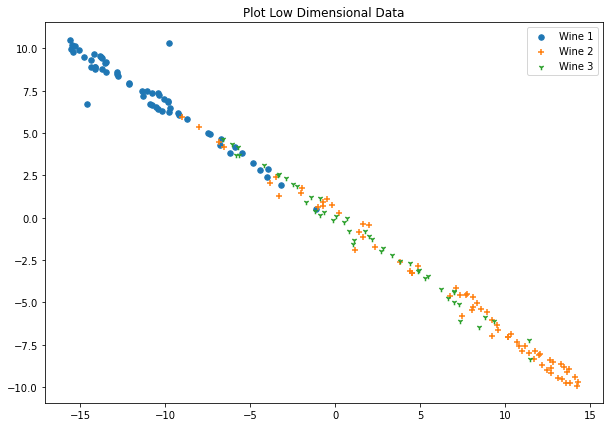

In [13]:
Markers = ['o', '+', '1']
plt.figure(figsize=(10, 7))
plt.title('Plot Low Dimensional Data')
for i in range(1, 4):
    selections = wine_tsne[labels == i]
    plt.scatter(selections[:, 0], selections[:, 1], marker = Markers[i-1], label=f'Wine {i}', s=30)
    plt.legend()
plt.show()

# t-SNE Wine and Perplexity

<b> Load the Wine dataset and inspect the first five rows </b>

In [14]:
wine = pd.read_csv('datasets/wine.data', header=None)
wine.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


<b> The first column provides the labels; extract these from the DataFrame and store them in a separate variable. Ensure that the column is removed from the DataFrame </b>

In [15]:
labels = wine[0]
del wine[0]

In [16]:
wine.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


<b> Execute PCA on the dataset and extract the first six components </b>

In [17]:
model_pca = PCA(n_components=6)
wine_pca = model_pca.fit_transform(wine)
wine_pca = wine_pca.reshape((len(wine_pca)), -1)

<b> Construct a loop that iterates through the perplexity values (1, 5, 20, 30, 80, 160, 320). For each loop, generate a t-SNE model with the corresponding perplexity and print a scatter plot of the labeled wine classes. Note the effect of different perplexity values </b>

[t-SNE] Computing 4 nearest neighbors...
[t-SNE] Indexed 178 samples in 0.000s...
[t-SNE] Computed neighbors for 178 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 178 / 178
[t-SNE] Mean sigma: 1.024201
[t-SNE] KL divergence after 250 iterations with early exaggeration: 85.398964
[t-SNE] KL divergence after 1000 iterations: 2.195380


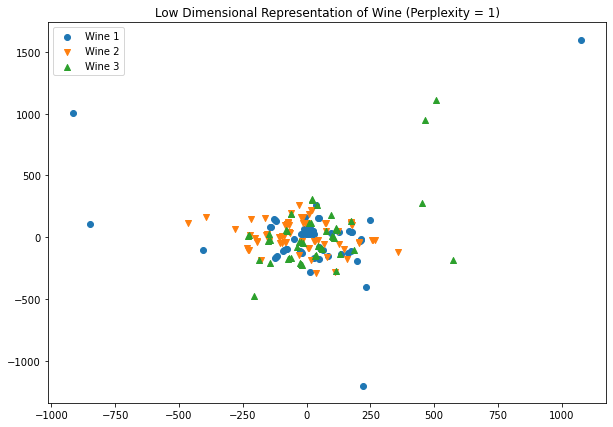

[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 178 samples in 0.010s...
[t-SNE] Computed neighbors for 178 samples in 0.000s...
[t-SNE] Computed conditional probabilities for sample 178 / 178
[t-SNE] Mean sigma: 7.205146
[t-SNE] KL divergence after 250 iterations with early exaggeration: 57.682838
[t-SNE] KL divergence after 1000 iterations: 0.209623


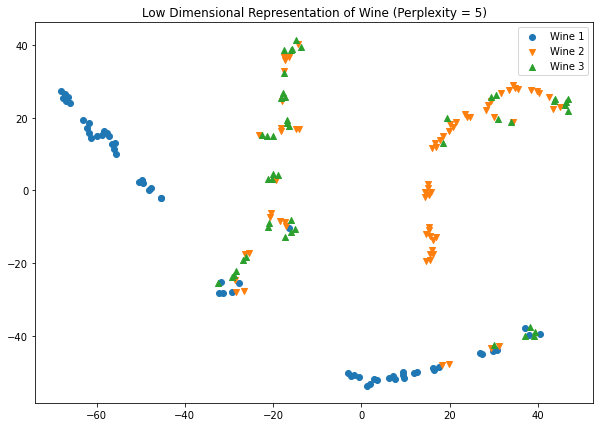

[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 178 samples in 0.000s...
[t-SNE] Computed neighbors for 178 samples in 0.008s...
[t-SNE] Computed conditional probabilities for sample 178 / 178
[t-SNE] Mean sigma: 9.052972
[t-SNE] KL divergence after 250 iterations with early exaggeration: 51.264133
[t-SNE] KL divergence after 1000 iterations: 0.159653


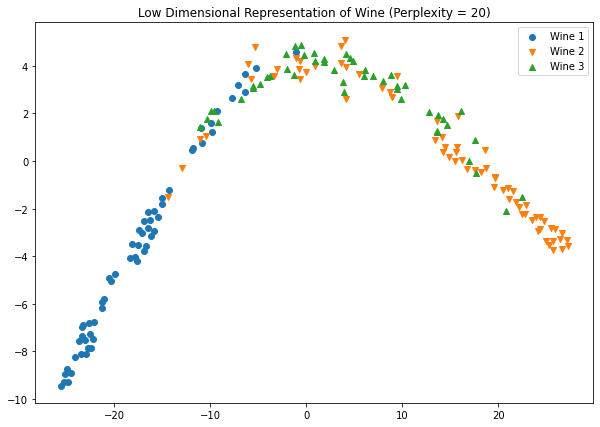

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 178 samples in 0.000s...
[t-SNE] Computed neighbors for 178 samples in 0.020s...
[t-SNE] Computed conditional probabilities for sample 178 / 178
[t-SNE] Mean sigma: 9.207049
[t-SNE] KL divergence after 250 iterations with early exaggeration: 51.192078
[t-SNE] KL divergence after 750 iterations: 0.128432


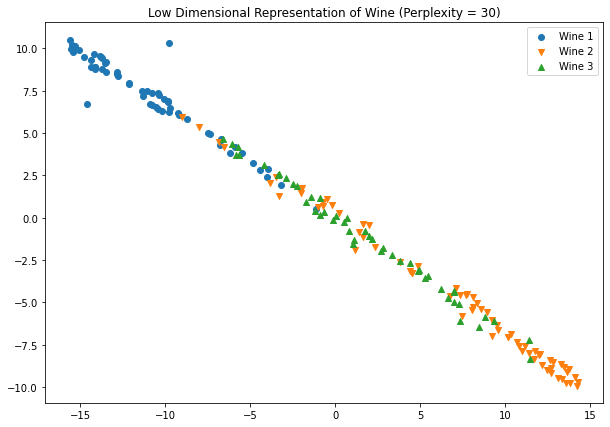

[t-SNE] Computing 177 nearest neighbors...
[t-SNE] Indexed 178 samples in 0.000s...
[t-SNE] Computed neighbors for 178 samples in 0.010s...
[t-SNE] Computed conditional probabilities for sample 178 / 178
[t-SNE] Mean sigma: 150.912291
[t-SNE] KL divergence after 250 iterations with early exaggeration: 45.912148
[t-SNE] KL divergence after 700 iterations: 0.028009


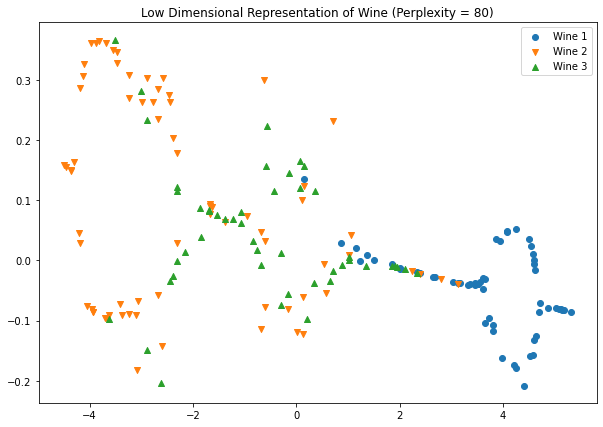

[t-SNE] Computing 177 nearest neighbors...
[t-SNE] Indexed 178 samples in 0.000s...
[t-SNE] Computed neighbors for 178 samples in 0.010s...
[t-SNE] Computed conditional probabilities for sample 178 / 178
[t-SNE] Mean sigma: 544.542009
[t-SNE] KL divergence after 250 iterations with early exaggeration: 44.091152
[t-SNE] KL divergence after 850 iterations: 0.000882


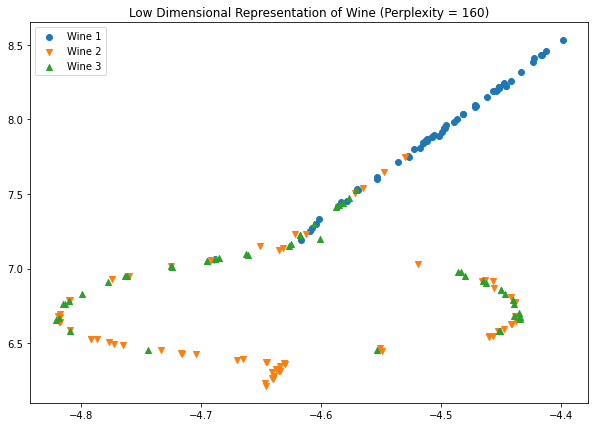

[t-SNE] Computing 177 nearest neighbors...
[t-SNE] Indexed 178 samples in 0.000s...
[t-SNE] Computed neighbors for 178 samples in 0.000s...
[t-SNE] Computed conditional probabilities for sample 178 / 178
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 38.712177
[t-SNE] KL divergence after 400 iterations: 0.000001


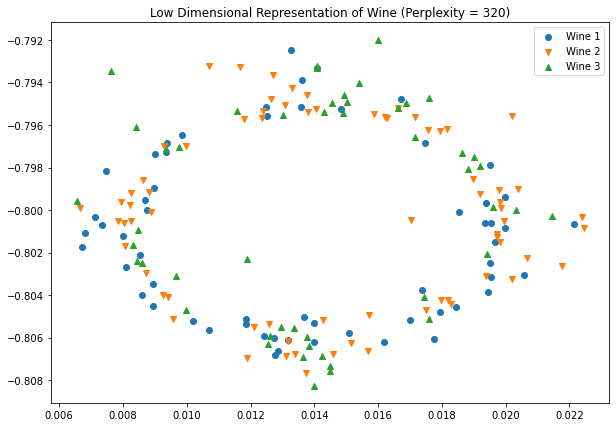

In [18]:
MARKER = ['o', 'v', '^']
for perp in [1, 5, 20, 30, 80, 160, 320]:
    tsne_model = TSNE(random_state=0, verbose=1, perplexity=perp)
    wine_tsne = tsne_model.fit_transform(wine_pca)
    plt.figure(figsize=(10, 7))
    plt.title(f'Low Dimensional Representation of Wine (Perplexity = {perp})')
    for i in range(1, 4):
        selections = wine_tsne[labels == i]
        plt.scatter(selections[:, 0], selections[:, 1], marker=MARKER[i-1], label=f'Wine {i}')
        plt.legend()
    plt.show()

By looking at the individual plots for each of the perplexity values, the effect perplexity has on the visualization of data is immediately obvious. Very small or very large perplexity values produce a range of unusual shapes that don't indicate the presence of any persistent pattern. The most plausible value seems to be 30 (Figure 6.35), which produced the most linear plot.

# t-SNE MNIST and Iterations

<b> Load the Wine dataset and inspect the first five rows </b>

In [19]:
wine = pd.read_csv('datasets/wine.data', header=None)
wine.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


<b> The first column provides the labels; extract these from the DataFrame and store them in a separate variable. Ensure that the column is removed from the DataFrame </b>

In [20]:
labels = wine[0]
del wine[0]

In [21]:
wine.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


<b> Execute PCA on the dataset and extract the first six components </b>

In [22]:
model_pca = PCA(n_components=6)
wine_pca = model_pca.fit_transform(wine)
wine_pca = wine_pca.reshape((len(wine_pca), -1))

<b> Construct a loop that iterates through the iteration values (250, 500, 1000). For each loop, generate a t-SNE model with the corresponding number of iterations and an identical number of iterations without progress values </b>

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 178 samples in 0.000s...
[t-SNE] Computed neighbors for 178 samples in 0.018s...
[t-SNE] Computed conditional probabilities for sample 178 / 178
[t-SNE] Mean sigma: 9.207049
[t-SNE] KL divergence after 250 iterations with early exaggeration: 51.192078
[t-SNE] KL divergence after 251 iterations: 179769313486231570814527423731704356798070567525844996598917476803157260780028538760589558632766878171540458953514382464234321326889464182768467546703537516986049910576551282076245490090389328944075868508455133942304583236903222948165808559332123348274797826204144723168738177180919299881250404026184124858368.000000


C:\Users\Hevans\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: Mean of empty slice.
  from ipykernel import kernelapp as app
C:\Users\Hevans\AppData\Roaming\Python\Python37\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


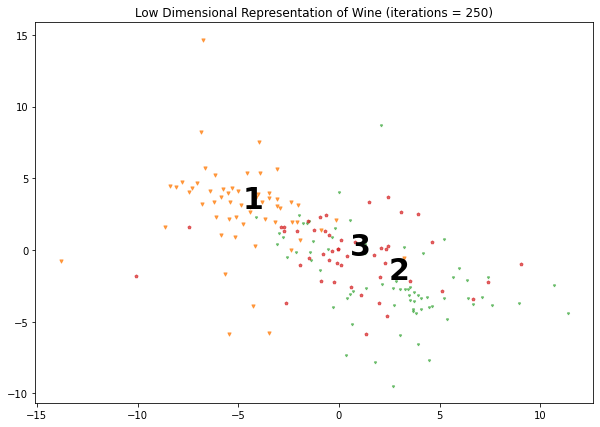

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 178 samples in 0.000s...
[t-SNE] Computed neighbors for 178 samples in 0.010s...
[t-SNE] Computed conditional probabilities for sample 178 / 178
[t-SNE] Mean sigma: 9.207049
[t-SNE] KL divergence after 250 iterations with early exaggeration: 51.192078
[t-SNE] KL divergence after 500 iterations: 0.146994


C:\Users\Hevans\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: Mean of empty slice.
  from ipykernel import kernelapp as app
C:\Users\Hevans\AppData\Roaming\Python\Python37\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


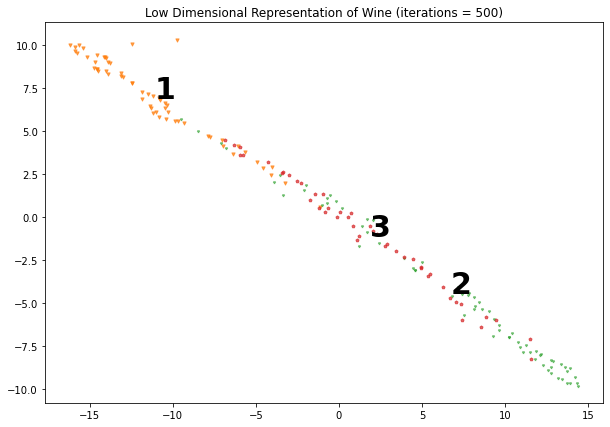

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 178 samples in 0.000s...
[t-SNE] Computed neighbors for 178 samples in 0.022s...
[t-SNE] Computed conditional probabilities for sample 178 / 178
[t-SNE] Mean sigma: 9.207049
[t-SNE] KL divergence after 250 iterations with early exaggeration: 51.192078
[t-SNE] KL divergence after 1000 iterations: 0.160571


C:\Users\Hevans\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: Mean of empty slice.
  from ipykernel import kernelapp as app
C:\Users\Hevans\AppData\Roaming\Python\Python37\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


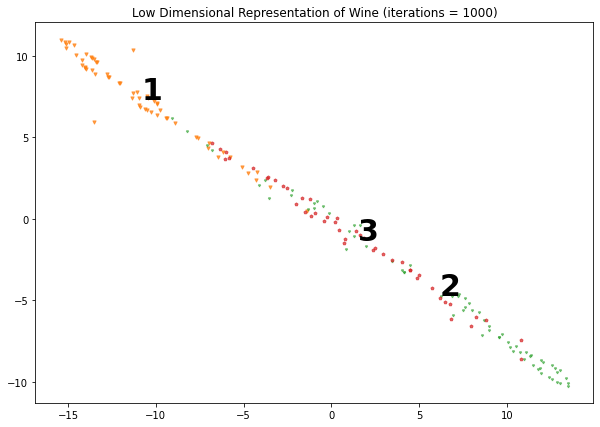

In [23]:
MARKER = ['o', 'v', '1', 'p' ,'*', '+', 'x', 'd', '4', '.']
for iterations in [250, 500, 1000]:
    model_tsne = TSNE(random_state=0,
                     verbose=1,
                     n_iter=iterations,
                     n_iter_without_progress=iterations)
    wine_tsne = model_tsne.fit_transform(wine_pca)
    plt.figure(figsize=(10, 7))
    plt.title(f'Low Dimensional Representation of Wine \
(iterations = {iterations})')
    for i in range(10):
        selections = wine_tsne[labels == i]
        plt.scatter(selections[:,0], selections[:,1], \
                    alpha=0.7, marker=MARKER[i], s=10);
        x, y = selections.mean(axis=0)
        plt.text(x, y, str(i), \
                 fontdict={'weight': 'bold', 'size': 30})
    plt.show()